<a href="https://colab.research.google.com/github/KartikMalik958/SIH-Hackathon-Byte-Karma/blob/main/sihinternal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!apt-get install -y texlive-xetex

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  dvisvgm fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono fonts-texgyre
  fonts-urw-base35 libapache-pom-java libcommons-logging-java libcommons-parent-java
  libfontbox-java libfontenc1 libgs9 libgs9-common libidn12 libijs-0.35 libjbig2dec0 libkpathsea6
  libpdfbox-java libptexenc1 libruby3.0 libsynctex2 libteckit0 libtexlua53 libtexluajit2 libwoff1
  libzzip-0-13 lmodern poppler-data preview-latex-style rake ruby ruby-net-telnet ruby-rubygems
  ruby-webrick ruby-xmlrpc ruby3.0 rubygems-integration t1utils teckit tex-common tex-gyre
  texlive-base texlive-binaries texlive-fonts-recommended texlive-latex-base texlive-latex-extra
  texlive-latex-recommended texlive-pictures texlive-plain-generic tipa xfonts-encodings
  xfonts-utils
Suggested packages:
  fonts-noto fonts-freefont-otf | fonts-freefont-ttf libavalon-framework-ja

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("dataset.csv")#enter your dataset file here

In [4]:
unique = 0
for col in df.columns[1:]:
    unique += len(df[col].unique())
unique

408

In [5]:
unique_symptoms = pd.unique(df[['Symptom_1', 'Symptom_2', 'Symptom_3', 'Symptom_4',
       'Symptom_5', 'Symptom_6', 'Symptom_7', 'Symptom_8', 'Symptom_9',
       'Symptom_10', 'Symptom_11', 'Symptom_12', 'Symptom_13', 'Symptom_14',
       'Symptom_15', 'Symptom_16', 'Symptom_17']].values.ravel('K'))
unique_symptoms = [symptom for symptom in unique_symptoms if symptom]

print("Unique Symptoms:", len(unique_symptoms))


Unique Symptoms: 132


In [6]:
one_hot_df = pd.DataFrame(index=df.index)

for symptom in unique_symptoms:
    one_hot_df[symptom] = df.apply(lambda row: 1 if symptom in row.values else 0, axis=1)

df_final = pd.concat([df[['Disease']], one_hot_df], axis=1)

In [7]:
df_final.shape

(4920, 133)

In [8]:
df_final.head(10)

,Disease,itching,skin_rash,continuous_sneezing,shivering,stomach_pain,acidity,vomiting,indigestion,muscle_wasting,...,abnormal_menstruation,receiving_unsterile_injections,coma,sinus_pressure,palpitations,stomach_bleeding,runny_nose,congestion,blood_in_sputum,loss_of_smell
0,Fungal infection,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Fungal infection,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Fungal infection,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Fungal infection,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Fungal infection,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Fungal infection,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,Fungal infection,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,Fungal infection,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,Fungal infection,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,Fungal infection,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
X = df_final.drop(["Disease"], axis=1)

X.columns = X.columns.astype(str)
X = X.apply(pd.to_numeric, errors='coerce')

Number of outliers: 0 for DBSCAN


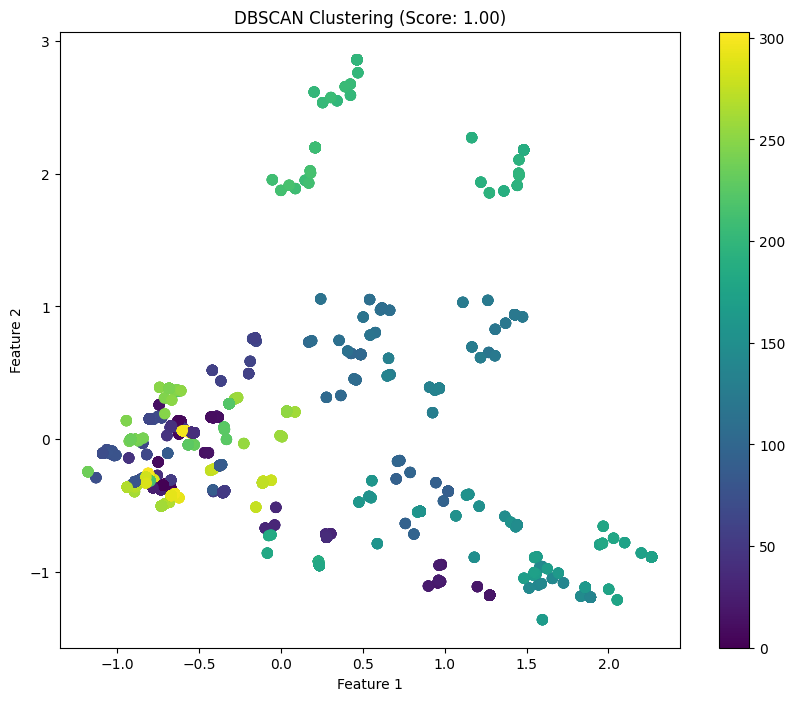

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# Perform PCA for dimensionality reduction
pca = PCA()
X_reduced = pca.fit_transform(X)

# Apply DBSCAN
dbscan = DBSCAN()
clusters = dbscan.fit_predict(X)

# Calculate silhouette score
if len(set(clusters)) > 1:  # Silhouette score requires at least 2 clusters
    score = silhouette_score(X, clusters)
else:
    score = None

# Plot clusters
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=clusters, cmap='viridis', s=50)
plt.title(f'DBSCAN Clustering (Score: {score:.2f})')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(scatter)

# Count the number of outliers (points labeled as -1)
num_outliers = np.sum(clusters == -1)
print(f'Number of outliers: {num_outliers} for DBSCAN')

plt.show()


In [46]:
import time
import gspread
from google.auth.transport.requests import Request
from google.oauth2.service_account import Credentials

# Set up credentials and Google Sheet access
creds = Credentials.from_service_account_file('plucky-bulwark-408518-9f96110c6b50.json')#enter your json key here(create using google cloud servies).Enable google sheets and drive apis.
gc = gspread.authorize(creds)
sheet = client.open_by_url("https://docs.google.com/spreadsheets/d/1uyFt4cubiytGD4cN_t8ahabR4fXoZtCdc0sEsmMiy8s/edit?gid=0#gid=0").sheet1 #Input url to your google sheet connected to the html/vss code

# Get the initial length of the sheet
initial_length = len(sheet.get_all_values())

while True:
    # Get the current length of the sheet
    current_length = len(sheet.get_all_values())

    if current_length > initial_length:
        # Run your code here
        print("New entry detected. Running code...")
        break

        # Update the stored length
        initial_length = current_length

    # Wait for a defined interval before checking again
    time.sleep(5)

New entry detected. Running code...


In [47]:
import gspread
from oauth2client.service_account import ServiceAccountCredentials

# Define the scope
scope = ["https://spreadsheets.google.com/feeds", "https://www.googleapis.com/auth/drive"]

# Authenticate using the JSON file
creds = ServiceAccountCredentials.from_json_keyfile_name('plucky-bulwark-408518-9f96110c6b50.json', scope)#your json key
client = gspread.authorize(creds)

# Open the Google Sheet by its URL
sheet = client.open_by_url("https://docs.google.com/spreadsheets/d/1uyFt4cubiytGD4cN_t8ahabR4fXoZtCdc0sEsmMiy8s/edit?gid=0#gid=0").sheet1#your google sheet url

# Get all values from the sheet
all_values = sheet.get_all_values()

# Access the last row
last_row = all_values[-1] if all_values else None

# Print the last row
print(last_row)



['Kartik Malik', 'kartikml420@gmail.com', '19', 'male', 'A+', 'SBI', 'Non-Vegetarian', 'Regular', '6', '10', 'itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing', 'Vicodin', 'NaN']


In [48]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import cdist

# Symptoms to test
new_symptoms = last_row[10:14]

# Create a new row with the symptoms, ensuring column names are strings
new_row = {str(symptom): 1 if symptom in new_symptoms else 0 for symptom in unique_symptoms}
new_symptom_df = pd.DataFrame([new_row])

# Ensure the columns of new_symptom_df match those of X
new_symptom_df = new_symptom_df.reindex(columns=X.columns, fill_value=0)

# Apply the same PCA transformation
new_symptom_reduced = pca.transform(new_symptom_df)

# Calculate distances to each point in the existing clusters
distances = cdist(new_symptom_reduced, X_reduced, metric='euclidean')
closest_point_idx = np.argmin(distances)
predicted_cluster = clusters[closest_point_idx]

# Predict the disease based on the closest cluster
if predicted_cluster == -1:
    predicted_disease = 'Outlier - No matching disease found'
else:
    cluster_diseases = df_final.loc[clusters == predicted_cluster, 'Disease']
    predicted_disease = cluster_diseases.mode()[0]  # Get the most common disease in the cluster

# Store the predicted disease as a string
predicted_disease_str = str(predicted_disease)

print(f'Predicted Disease: {predicted_disease_str}')


Predicted Disease: Fungal infection


In [49]:
predicted_disease_str

'Fungal infection'

In [50]:
import os
import google.generativeai as genai
from google.colab import userdata

# Access the API key from Colab secrets
GOOGLE_API_KEY = userdata.get('GOOGLE_API_KEY').strip()
#if key not working create a gemini api key and set it up using the key icon on the left pannel
if GOOGLE_API_KEY:
    print("API Key is set.")
else:
    print("API Key is not set.")

# Set up the API key
if not GOOGLE_API_KEY:
    raise ValueError("API key not found. Please set the GOOGLE_API_KEY secret in Colab.")

# Configure the Generative AI model
genai.configure(api_key=GOOGLE_API_KEY)

def clean_recommendations(recommendations):
    # Remove asterisks or other unwanted characters
    cleaned = []
    for line in recommendations:
        line = line.replace('*', '').strip()
        cleaned.append(line)
    return cleaned

def get_lifestyle_recommendations(disease):
    prompt = f"What are 4 lifestyle changes recommended for managing {disease}? Do not tell me to seek professional help. Just provide me with 4 accurate suggestions."

    try:
        response = genai.generate_text(prompt=prompt)
        recommendations = [line.strip() for line in response.result.split('\n') if line.strip()]
        recommendations = clean_recommendations(recommendations)
        return recommendations[:4]  # Limit to only 4 recommendations
    except Exception as e:
        print(f"Error in fetching recommendations: {e}")
        return ["Consult a healthcare professional for personalized advice."]

if __name__ == "__main__":
    disease = predicted_disease_str
    if disease:
        lifestyle_changes = get_lifestyle_recommendations(disease)
        print(f"Lifestyle recommendations for {disease.capitalize()}:")
        for change in lifestyle_changes:
            print(f"- {change}")
    else:
        print("Please enter a valid disease name.")




API Key is set.
Lifestyle recommendations for Fungal infection:
- 1. Keep your skin clean and dry. This is especially important in areas where the skin is moist, such as the groin, armpits, and between the toes. Be sure to wash these areas with soap and water every day, and dry them thoroughly afterward.
- 2. Avoid wearing tight-fitting clothing. Tight-fitting clothing can trap moisture against the skin, which can create a breeding ground for fungal infections. Wear loose-fitting clothing made from natural materials, such as cotton, that allow the skin to breathe.
- 3. Use antifungal powders or creams. These products can help to kill fungal spores and prevent them from spreading. Apply them to the affected area twice a day, or as directed by your doctor.
- 4. Practice good hygiene. This includes washing your hands frequently, especially after using the bathroom or changing your clothes. It also means not sharing personal items, such as towels, razors, and nail clippers, with other peop

In [51]:
if len(lifestyle_changes)==4:
  recom1=lifestyle_changes[0]
  recom2=lifestyle_changes[1]
  recom3=lifestyle_changes[2]
  recom4=lifestyle_changes[3]
elif len(lifestyle_changes)==3:
  recom1=lifestyle_changes[0]
  recom2=lifestyle_changes[1]
  recom3=lifestyle_changes[2]
  recom4=" "
elif len(lifestyle_changes)==2:
  recom1=lifestyle_changes[0]
  recom2=lifestyle_changes[1]
  recom3=" "
  recom4=" "
elif len(lifestyle_changes)==1:
  recom1=lifestyle_changes[0]
  recom2=" "
  recom3=" "
  recom4=" "


In [52]:
for x in range(10,14):
      last_row[x]=last_row[x].replace('_',' ')
      last_row[x]=last_row[x].capitalize()
last_row

['Kartik Malik',
 'kartikml420@gmail.com',
 '19',
 'male',
 'A+',
 'SBI',
 'Non-Vegetarian',
 'Regular',
 '6',
 '10',
 'Itching',
 'Skin rash',
 'Nodal skin eruptions',
 'Continuous sneezing',
 'Vicodin',
 'NaN']

In [53]:
# Define your data
data = {
    "name": last_row[0],
    "email":last_row[1],
    "age": last_row[2],
    "gender":last_row[3],
    "blood_group": last_row[4],
    "insurance":last_row[5],
    "diet":last_row[6],
    "exercise":last_row[7],
    "sleep":last_row[8],
    "stress":last_row[9],
    "symp1": last_row[10],
    "symp2": last_row[11],
    "symp3": last_row[12],
    "symp4": last_row[13],
    "medi":last_row[14],
    "surgery":last_row[15],
    "diagnosis":predicted_disease_str,
    "recom1":recom1,
    "recom2":recom2 ,
    "recom3":recom3,
    "recom4":recom4,
}

# Read the template
with open('sih.tex', 'r') as file:#your tex file goes here
    tex_content = file.read()

# Replace placeholders
for key, value in data.items():
    tex_content = tex_content.replace(f'\\VAR{{{key}}}', value)

# Write the new .tex file
with open('filled_template.tex', 'w') as file:
    file.write(tex_content)

# Compile the LaTeX file using xelatex
!xelatex filled_template.tex

This is XeTeX, Version 3.141592653-2.6-0.999993 (TeX Live 2022/dev/Debian) (preloaded format=xelatex)
 restricted \write18 enabled.
entering extended mode
(./filled_template.tex
LaTeX2e <2021-11-15> patch level 1
L3 programming layer <2022-01-21>
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2021/10/04 v1.4n Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size12.clo))
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/share/texlive/texmf-dist/tex/generic/iftex/ifvtex.sty
(/usr/share/texlive/texmf-dist/tex/generic/iftex/iftex.sty)))
(/usr/share/texlive/texmf-dist/tex/latex/amsmath/amsmath.sty
For additional information on amsmath, use the `?' option.
(/usr/share/texlive/texmf-dist/tex/latex/amsmath/amstext.sty
(/usr/share/texlive/texmf-dist/tex/latex/amsmath/amsgen.sty))
(/usr/share/texlive/texmf-dist/tex/latex/amsmath/amsbsy.sty)
(/usr/share/te

In [54]:
from google.colab import files
files.download('filled_template.pdf')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>